Final Python Notebook 02

Author : Sanali Lokuge

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

Reused from Code Re-use session 02

In [ ]:
#Load data from CSV file
X_classification=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/X_classification.csv')
y_classification=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/y_classification.csv')
#Dropping the invalid columns
X_classification.drop(columns=['Unnamed: 0'],inplace=True)
y_classification.drop(columns=['Unnamed: 0'],inplace=True)
print(X_classification.head())
y_classification.head()

   Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0   68    1        0        0          0               1      3        1   
1   50    1        1        1          2               0      2        1   
2   58    1        2        2          4               0      2        1   
3   58    1        0        0          0               1      3        1   
4   47    1        1        0          1               1      3        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0           4                1                    1                      24   
1          35                1                    1                      14   
2          63                1                    1                      14   
3          18                1                    1                       2   
4          41                1                    1                       3   

   Reginol_Node_Positive  
0                      1  
1             

,Mortality_Status
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Get dataset dimension
print(X_classification.shape)
print(list(y_classification.columns))
#Get the list of columns
list(X_classification.columns)

(3985, 13)
['Mortality_Status']


['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive']

Re-used from Tutorial 01

In [ ]:
#Get the sum of null values
X_classification.isnull().sum()

,0
Age,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0


Reused from Code Re-use session 02

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = X_classification
y = y_classification

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.squeeze()  # Remove any extra dimensions, turning y_train into 1D
y_test = y_test.squeeze()

print('Whole Data shape', X_classification.shape + y_classification.shape)
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

Whole Data shape (3985, 13, 3985, 1)
X_train shape (3188, 13)
y_train shape (3188,)


In [ ]:
X_classification.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive
0,68,1,0,0,0,1,3,1,4,1,1,24,1
1,50,1,1,1,2,0,2,1,35,1,1,14,5
2,58,1,2,2,4,0,2,1,63,1,1,14,7
3,58,1,0,0,0,1,3,1,18,1,1,2,1
4,47,1,1,0,1,1,3,1,41,1,1,3,1


In [ ]:
#Stratify=y, same ratio in train and test splits
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Mortality_Status
0    0.847867
1    0.152133
Name: proportion, dtype: float64
Mortality_Status
0    0.848181
1    0.151819
Name: proportion, dtype: float64


# **Training Models**

**1.Logistic Regression**

Reused from Code Re-use session 02

In [ ]:
# Train the model Logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Reused from Code Re-use session 02

In [ ]:
# Make predictions
y_pred_log= logreg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,   y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       676
           1       0.58      0.12      0.20       121

    accuracy                           0.85       797
   macro avg       0.72      0.55      0.56       797
weighted avg       0.82      0.85      0.81       797



Re-used from Tutorial 02

In [ ]:
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_pred_log)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)

The Logistic Regression Model Accuracy: 0.8531994981179423


Reused from Code Re-use session 02

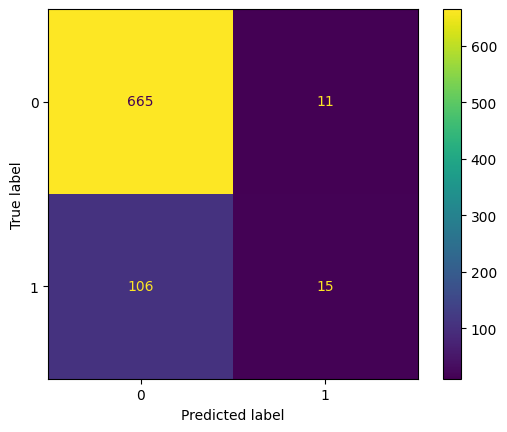

In [ ]:
# Construct the confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm_log,display_labels=logreg.classes_)
disp.plot()

Reused from Code Re-use session 02

In [ ]:
#Display the comparision dataframe
Comparison_df = pd.DataFrame({'Actual Diabetic Diagnoses' : y_test,'Predicted' : y_pred_log})
Comparison_df.to_csv(r'/content/Comparison_df.csv', index=True)
Comparison_df

,Actual Diabetic Diagnoses,Predicted
3141,0,0
1103,0,0
844,0,0
2582,1,0
2252,0,0
...,...,...
2344,0,0
2037,1,0
3900,0,0
1450,0,0


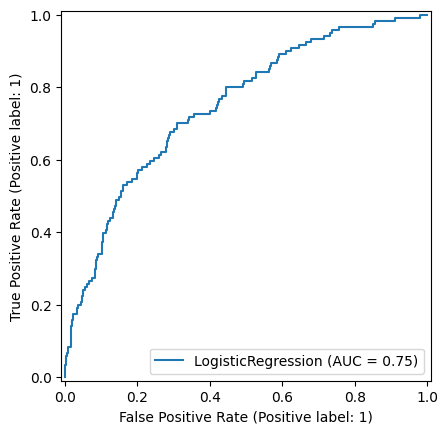

In [ ]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
Logreg_roc = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

**2.KNN Model**

Reused from Code Re-use session 02

In [ ]:
# Train KNN with default k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Reused from Code Re-use session 02

In [ ]:
# Make predictions
y_pred_knn= knn.predict(X_test)

# Evaluate performance
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       676
           1       0.53      0.15      0.23       121

    accuracy                           0.85       797
   macro avg       0.70      0.56      0.57       797
weighted avg       0.81      0.85      0.81       797



Reused from Code Re-use session 02

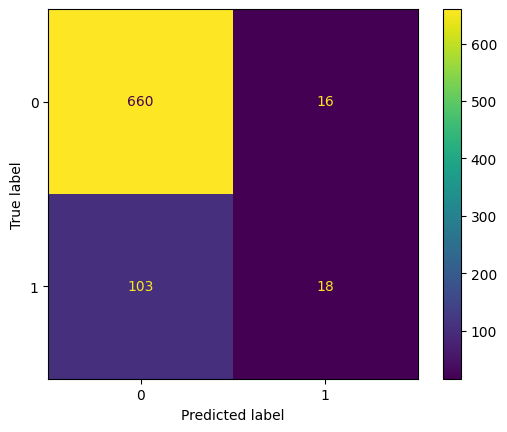

In [ ]:
#Display confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(cm_knn,display_labels=knn.classes_)
disp.plot()

Re-used from Tutorial 02

In [ ]:
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_pred_knn)
# Display the accuracy
print ('The KNNModel Accuracy:',accuracy)

The KNNModel Accuracy: 0.8506900878293601


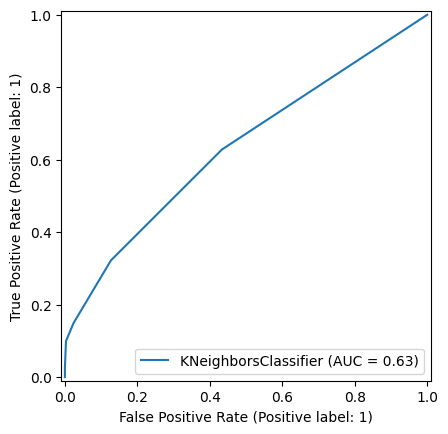

In [ ]:
#Display AUC-ROC curve for KNN
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Reused from Code Re-use session 02

In [ ]:
#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df=pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_knn})
compare_results_knn_df.to_csv(r'/content/knn_pred_comparison.csv', index=True)
compare_results_knn_df

,Actual,Predicted
3141,0,0
1103,0,0
844,0,0
2582,1,0
2252,0,0
...,...,...
2344,0,0
2037,1,0
3900,0,0
1450,0,0


**3.Naive Bayes Classifier**

Reused from Code Re-use session 02

In [ ]:
# Train the model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Reused from Code Re-use session 02

In [ ]:
# Make predictions
y_pred_nb= nb.predict(X_test)

# Evaluate performance
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       676
           1       0.36      0.40      0.38       121

    accuracy                           0.80       797
   macro avg       0.62      0.64      0.63       797
weighted avg       0.81      0.80      0.80       797



Reused from Code Re-use session 02

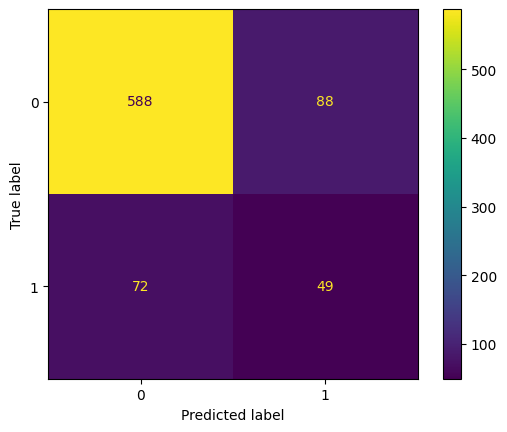

In [ ]:
#Display the confusion matrix for Naive Bayes
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=nb.classes_)
disp.plot()

Re-used from Tutorial 02

In [ ]:
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_pred_nb)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)

The Logistic Regression Model Accuracy: 0.7992471769134254


Reused from Code Re-use session 02

In [ ]:
#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_nb_df=pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_nb})
compare_results_nb_df.to_csv(r'/content/nb_pred_comparison.csv', index=True)
compare_results_nb_df

,Actual,Predicted
3141,0,0
1103,0,0
844,0,0
2582,1,0
2252,0,0
...,...,...
2344,0,0
2037,1,0
3900,0,0
1450,0,1


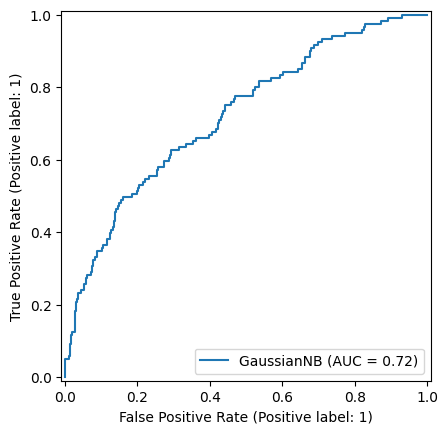

In [ ]:
nb_roc = RocCurveDisplay.from_estimator(nb, X_test, y_test)

In [ ]:
# Evaluate
print("Optimized KNN recall:", recall_score(y_test, y_pred_knn))
print("Optimized Logistic Regression recall:", recall_score(y_test, y_pred_log))
print("Optimized Naïve Bayes recall:", recall_score(y_test, y_pred_nb))

Optimized KNN recall: 0.1487603305785124
Optimized Logistic Regression recall: 0.12396694214876033
Optimized Naïve Bayes recall: 0.4049586776859504


#  Hyperparameter Tuning

Re-used from Tutorial 03

In [ ]:
#Best K-value for knn model
param_grid_knn = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train, y_train)
grid_search_knn.classes_

# Best parameters and model
print("Best parameters for KNN:", grid_search_knn.best_params_)

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': np.int64(1)}


Re-used from Tutorial 02 and parameters from [scikit-learn](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [ ]:
#Tuning Logistic regression model
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5, scoring='recall')
grid_search_log.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for Logistic Regression:", grid_search_log.best_params_)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


Re-used from Tutorial 03 and parameter from [sklearner](https://https://sklearner.com/sklearn-gaussiannb-var_smoothing-parameter)

In [ ]:
#Tuning the Naive Bayes
param_grid_nb = {'var_smoothing': np.logspace(-9, 0, 10)}
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='recall')
grid_search_nb.fit(X_train, y_train)

print("Best parameters for Naïve Bayes:", grid_search_nb.best_params_)

Best parameters for Naïve Bayes: {'var_smoothing': np.float64(1e-09)}


Re-used from Tutorial 02

In [ ]:
# Predictions with best models
y_pred_best_knn = grid_search_knn.predict(X_test)
y_pred_best_logreg = grid_search_log.predict(X_test)
y_pred_best_nb = grid_search_nb.predict(X_test)

# Evaluat
print("Optimized KNN F1-score:", recall_score(y_test, y_pred_best_knn))
print("Optimized Logistic Regression F1-score:", recall_score(y_test, y_pred_best_logreg))
print("Optimized Naïve Bayes F1-score:", recall_score(y_test, y_pred_best_nb))

Optimized KNN F1-score: 0.24793388429752067
Optimized Logistic Regression F1-score: 0.12396694214876033
Optimized Naïve Bayes F1-score: 0.4049586776859504


# **Model Comparison**

1.Confusion Matrices

Re-used from Tutorial 02

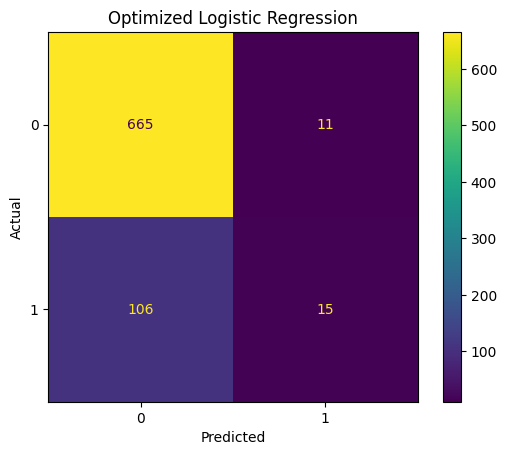

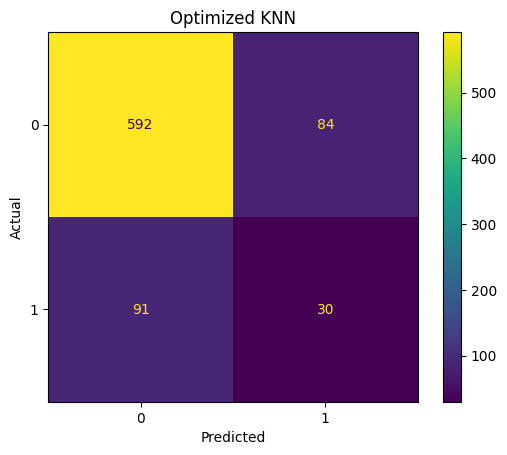

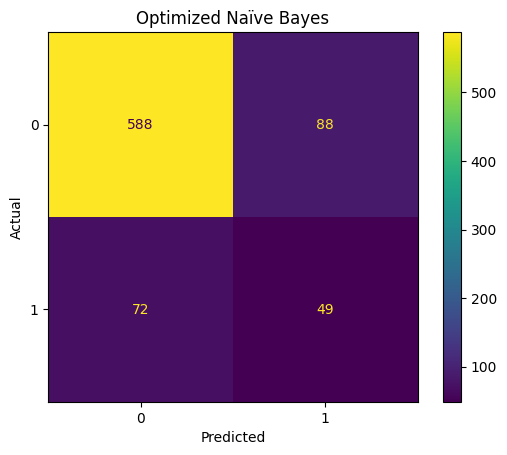

In [ ]:
#A common fucntion to splot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm_tuned = confusion_matrix(y_true, y_pred, labels=labels)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=labels)
    disp_cm.plot()
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")


plot_confusion_matrix(y_test, y_pred_best_logreg,logreg.classes_, "Optimized Logistic Regression")
plot_confusion_matrix(y_test, y_pred_best_knn,knn.classes_, "Optimized KNN")
plot_confusion_matrix(y_test, y_pred_best_nb,nb.classes_, "Optimized Naïve Bayes")

In [ ]:
print("Optimized KNN  Classification Report:\n:",  classification_report(y_test, y_pred_best_knn))
print("Optimized Logistic Regression  Classification Report:\n:",  classification_report(y_test, y_pred_best_logreg))
print("Optimized Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_best_nb))

Optimized KNN  Classification Report:
:               precision    recall  f1-score   support

           0       0.87      0.88      0.87       676
           1       0.26      0.25      0.26       121

    accuracy                           0.78       797
   macro avg       0.56      0.56      0.56       797
weighted avg       0.78      0.78      0.78       797

Optimized Logistic Regression  Classification Report:
:               precision    recall  f1-score   support

           0       0.86      0.98      0.92       676
           1       0.58      0.12      0.20       121

    accuracy                           0.85       797
   macro avg       0.72      0.55      0.56       797
weighted avg       0.82      0.85      0.81       797

Optimized Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       676
           1       0.36      0.40      0.38       121

    accuracy                           0

Re-used from Tutorial 02

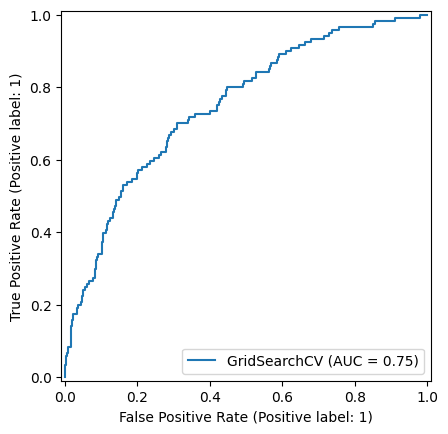

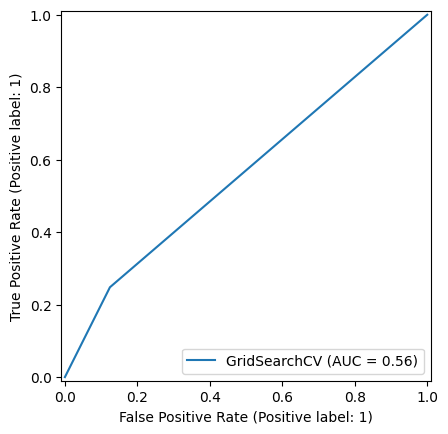

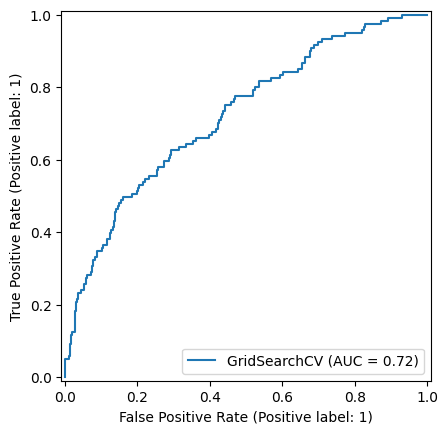

In [ ]:
logreg_tuned_roc = RocCurveDisplay.from_estimator(grid_search_log, X_test, y_test)
knn_tuned_roc = RocCurveDisplay.from_estimator(grid_search_knn, X_test, y_test)
nb_tuned_roc = RocCurveDisplay.from_estimator(grid_search_nb, X_test, y_test)

# nb_tuned_roc = RocCurveDisplay.from_estimator(grid_search_nb, X_test, y_test)

Re-used from Tutorial 02

Extracted from MachineLearningMastery(Scikit-learn [link text](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/))

In [ ]:
# Save models
joblib.dump(grid_search_knn, '/content/drive/MyDrive/Colab Notebooks/ML/Models/best_knn_model.pkl')
joblib.dump(grid_search_log, '/content/drive/MyDrive/Colab Notebooks/ML/Models/best_logreg_model.pkl')
joblib.dump(grid_search_nb, '/content/drive/MyDrive/Colab Notebooks/ML/Models/best_naive_bayes_model.pkl')


['/content/drive/MyDrive/Colab Notebooks/ML/Models/best_naive_bayes_model.pkl']